In [ ]:
# Decision Tree = cây quyết định
# Chia data thành các nhóm dựa trên rules (if-else)

# Ví dụ dự đoán giá nhà:
# - Nếu diện tích > 100m² → giá cao
#   - Nếu tuổi nhà < 5 năm → giá rất cao
#   - Ngược lại → giá trung bình
# - Ngược lại → giá thấp

# Mỗi "nếu" = 1 node split
# Kết quả cuối (lá) = predicted value


In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree (không cần scale!)
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predict
y_pred_tree = tree.predict(X_test)

# Evaluate
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Decision Tree R²: {r2_tree:.4f}")
print(f"Decision Tree RMSE: {rmse_tree:.4f}")


Decision Tree R²: 0.5997
Decision Tree RMSE: 0.7242


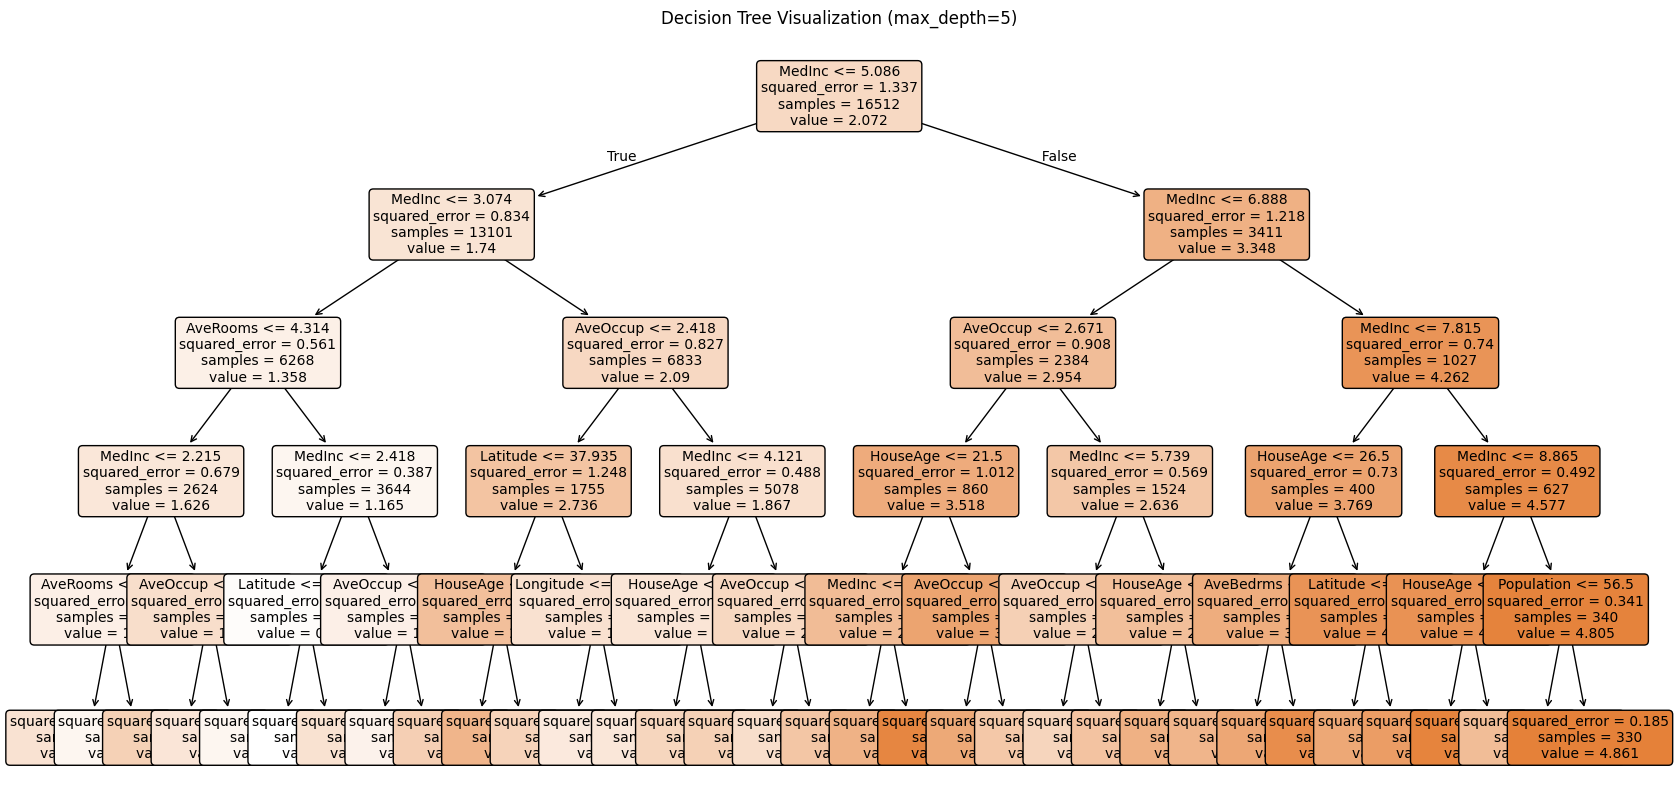

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    tree, 
    feature_names=data.feature_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization (max_depth=5)')
plt.show()


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# So sánh
print("Model Comparison:")
print("-" * 50)
print(f"Linear Regression | R²: {r2_lr:.4f} | RMSE: {rmse_lr:.4f}")
print(f"Decision Tree     | R²: {r2_tree:.4f} | RMSE: {rmse_tree:.4f}")


Model Comparison:
--------------------------------------------------
Linear Regression | R²: 0.5758 | RMSE: 0.7456
Decision Tree     | R²: 0.5997 | RMSE: 0.7242


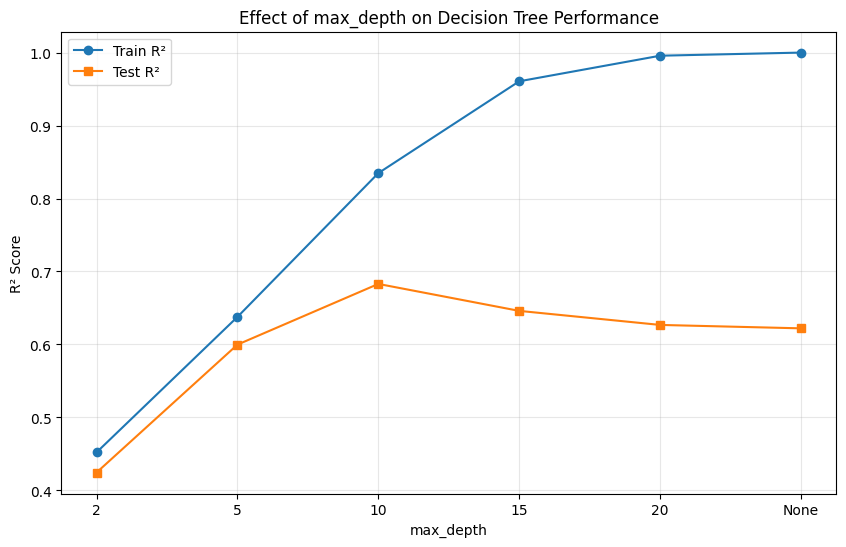


max_depth | Train R² | Test R²
----------------------------------------
        2 |   0.4520 |  0.4244
        5 |   0.6377 |  0.5997
       10 |   0.8348 |  0.6829
       15 |   0.9607 |  0.6460
       20 |   0.9957 |  0.6268
     None |   1.0000 |  0.6221


In [4]:
# Test nhiều max_depth
depths = [2, 5, 10, 15, 20, None]
train_scores = []
test_scores = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

# Plot
plt.figure(figsize=(10, 6))
depth_labels = [str(d) if d else 'None' for d in depths]
x = range(len(depths))

plt.plot(x, train_scores, marker='o', label='Train R²')
plt.plot(x, test_scores, marker='s', label='Test R²')
plt.xticks(x, depth_labels)
plt.xlabel('max_depth')
plt.ylabel('R² Score')
plt.title('Effect of max_depth on Decision Tree Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nmax_depth | Train R² | Test R²")
print("-" * 40)
for d, train, test in zip(depth_labels, train_scores, test_scores):
    print(f"{d:>9} | {train:8.4f} | {test:7.4f}")


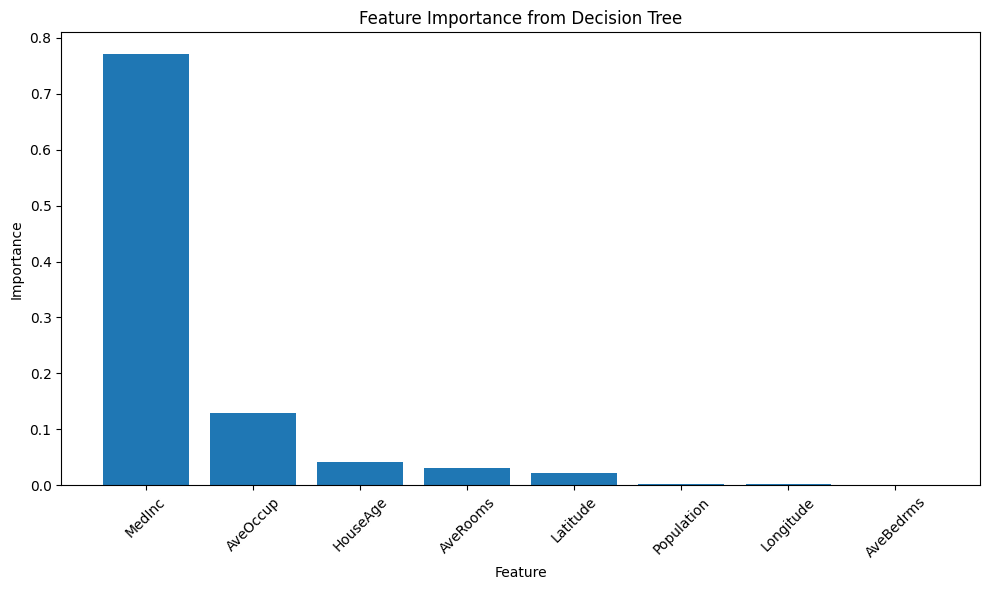

Feature Importance:
MedInc          | 0.7712
AveOccup        | 0.1284
HouseAge        | 0.0416
AveRooms        | 0.0313
Latitude        | 0.0220
Population      | 0.0025
Longitude       | 0.0021
AveBedrms       | 0.0009


In [5]:
# Decision Tree cho biết feature nào quan trọng nhất
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

feature_importance = tree.feature_importances_

# Sort và plot
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), 
           [data.feature_names[i] for i in indices], 
           rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.tight_layout()
plt.show()

print("Feature Importance:")
for i in indices:
    print(f"{data.feature_names[i]:15} | {feature_importance[i]:.4f}")


In [6]:
"""
Linear Regression:
✓ Quan hệ tuyến tính
✓ Cần model đơn giản, interpretable
✓ Data ít noise
✓ Muốn extrapolate (dự đoán ngoài khoảng train)

Decision Tree:
✓ Quan hệ phi tuyến, phức tạp
✓ Data có interactions giữa features
✓ Không cần scale features
✓ Muốn feature importance
✗ Dễ overfit nếu không tune
✗ Không extrapolate tốt
"""


'\nLinear Regression:\n✓ Quan hệ tuyến tính\n✓ Cần model đơn giản, interpretable\n✓ Data ít noise\n✓ Muốn extrapolate (dự đoán ngoài khoảng train)\n\nDecision Tree:\n✓ Quan hệ phi tuyến, phức tạp\n✓ Data có interactions giữa features\n✓ Không cần scale features\n✓ Muốn feature importance\n✗ Dễ overfit nếu không tune\n✗ Không extrapolate tốt\n'